In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random
from sklearn.metrics import mean_squared_error
from statistics import median

In [2]:
img = cv2.imread('Elaine.bmp',0)
R, C = img.shape

In [3]:
def convolve2D(image, kernel, padding=0, strides=1):
  kernel = np.flipud(np.fliplr(kernel))
  
  xKernShape = kernel.shape[0]
  yKernShape = kernel.shape[1]
  xImgShape = image.shape[0]
  yImgShape = image.shape[1]

  xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
  output = np.zeros((xOutput, yOutput))

  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    imagePadded = image

  for y in range(imagePadded.shape[1]):
    if y > imagePadded.shape[1] - yKernShape:
      break
    if y % strides == 0:
      for x in range(imagePadded.shape[0]):
        if x > imagePadded.shape[0] - xKernShape:
          break
        try:
          if x % strides == 0:
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
        except:
          break
  output[output>255]=255
  output[output<0]=0
  
  return output

In [4]:
def first_order_difference_filters (image, filter_type):
  if filter_type == 'a':
    filter_matrix = np.array([[1, 0, -1]])
    filter_matrix = filter_matrix / 2
  elif filter_type == 'b':
    filter_matrix = np.array([(1, 0, -1), (1, 0, -1), (1, 0, -1)])
    filter_matrix = filter_matrix / 6
  elif filter_type == 'c':
    filter_matrix = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)])
    filter_matrix = filter_matrix / 8
  else:
    return

  first_order_difference_filtered_image = convolve2D(image, filter_matrix, 1)

  return first_order_difference_filtered_image.astype(int)

Text(0.5, 1.0, 'Image: Filter Type A Added')

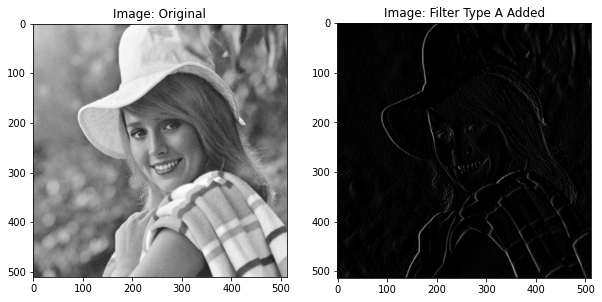

In [5]:
# 3.4.1 - Filter A

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

filtered_image_type_a = first_order_difference_filters(img, 'a')
filtered_mse_type_a = mean_squared_error(filtered_image_type_a[0: R, 0:C], img)

plot[1].imshow(filtered_image_type_a, cmap='gray')
plot[1].set_title("Image: Filter Type A Added")

Text(0.5, 1.0, 'Image: Filter Type B Added')

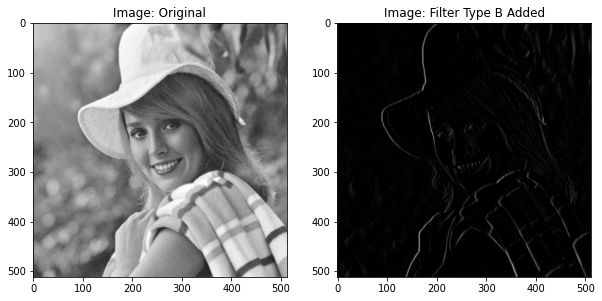

In [6]:
# 3.4.1 - Filter B

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

filtered_image_type_b = first_order_difference_filters(img, 'b')
filtered_mse_type_b = mean_squared_error(filtered_image_type_b[0: R, 0:C], img)

plot[1].imshow(filtered_image_type_b, cmap='gray')
plot[1].set_title("Image: Filter Type B Added")

Text(0.5, 1.0, 'Image: Filter Type C Added')

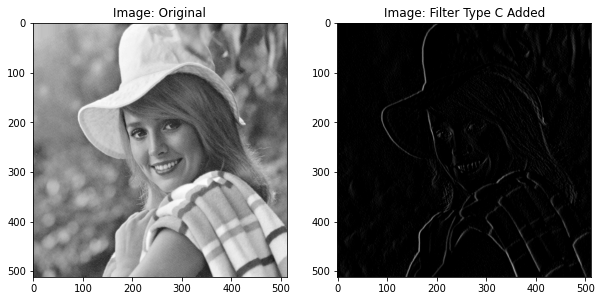

In [7]:
# 3.4.1 - Filter C

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

filtered_image_type_c = first_order_difference_filters(img, 'c')
filtered_mse_type_c = mean_squared_error(filtered_image_type_c[0: R, 0:C], img)

plot[1].imshow(filtered_image_type_c, cmap='gray')
plot[1].set_title("Image: Filter Type C Added")

MSE Report
Filter A = 20151.915966033936
Filter B = 20311.44912338257
Filter C = 20304.526206970215


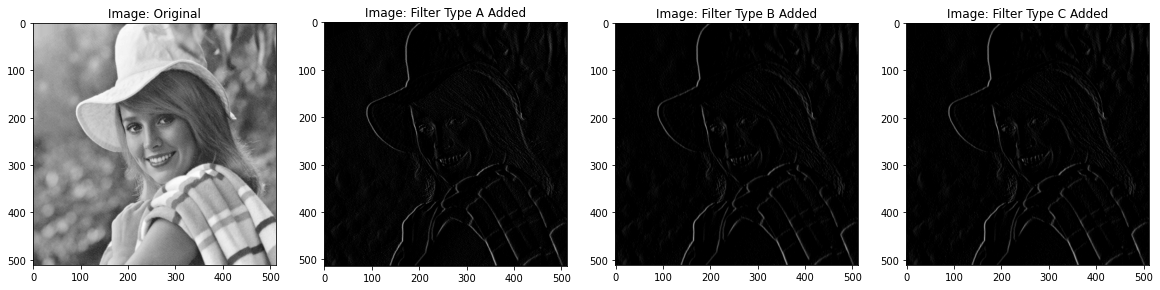

In [8]:
# 3.4.1 - All Filters Together

fig, plot = plt.subplots(1, 4, figsize = (20, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(filtered_image_type_a, cmap='gray')
plot[1].set_title("Image: Filter Type A Added")

plot[2].imshow(filtered_image_type_b, cmap='gray')
plot[2].set_title("Image: Filter Type B Added")

plot[3].imshow(filtered_image_type_c, cmap='gray')
plot[3].set_title("Image: Filter Type C Added")

print("MSE Report")
print("Filter A = " + str(filtered_mse_type_a))
print("Filter B = " + str(filtered_mse_type_b))
print("Filter C = " + str(filtered_mse_type_c))

In [9]:
def robert_filters (image, filter_type):
  if filter_type == 'a':
    filter_matrix = np.array([(1, 0), (0, -1)])
  elif filter_type == 'b':
    filter_matrix = np.array([(0, 1), (-1, 0)])
  else:
    return

  robert_filtered_image = convolve2D(image, filter_matrix, 1)

  return robert_filtered_image.astype(int)

Text(0.5, 1.0, 'Image: Filter Type A Added')

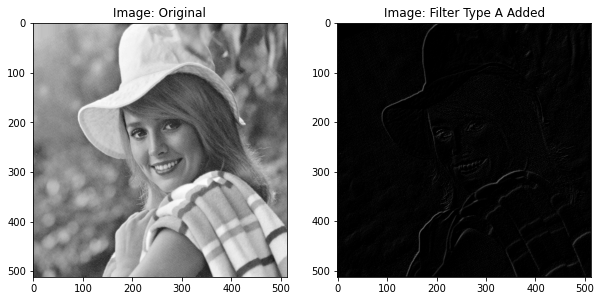

In [10]:
# 3.4.2 - Filter A

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

filtered_image_type_a = robert_filters(img, 'a')
filtered_mse_type_a = mean_squared_error(filtered_image_type_a[0: R, 0:C], img)

plot[1].imshow(filtered_image_type_a, cmap='gray')
plot[1].set_title("Image: Filter Type A Added")

Text(0.5, 1.0, 'Image: Filter Type B Added')

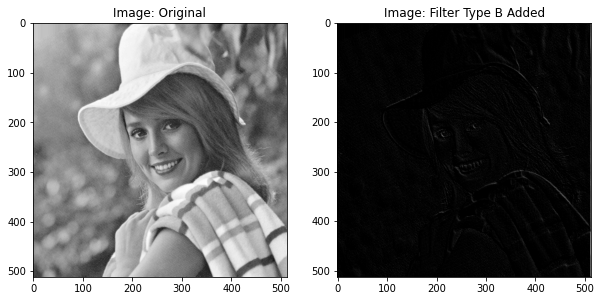

In [11]:
# 3.4.2 - Filter B

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

filtered_image_type_b = robert_filters(img, 'b')
filtered_mse_type_b = mean_squared_error(filtered_image_type_b[0: R, 0:C], img)

plot[1].imshow(filtered_image_type_b, cmap='gray')
plot[1].set_title("Image: Filter Type B Added")

MSE Report
Filter A = 19646.91464996338
Filter B = 19748.363647460938


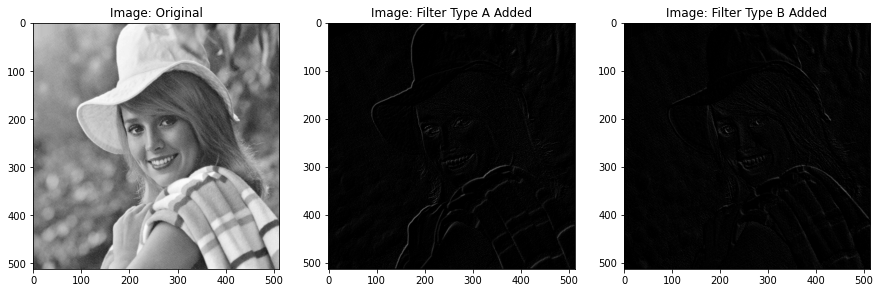

In [12]:
# 3.4.2 - All Filters Together

fig, plot = plt.subplots(1, 3, figsize = (15, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(filtered_image_type_a, cmap='gray')
plot[1].set_title("Image: Filter Type A Added")

plot[2].imshow(filtered_image_type_b, cmap='gray')
plot[2].set_title("Image: Filter Type B Added")

print("MSE Report")
print("Filter A = " + str(filtered_mse_type_a))
print("Filter B = " + str(filtered_mse_type_b))